In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/My Drive/NN/emails.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(csv_path)
print(df.head())


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7576 - loss: 0.5678 - val_accuracy: 0.8235 - val_loss: 0.3135
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8868 - loss: 0.2801 - val_accuracy: 0.9455 - val_loss: 0.1346
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9628 - loss: 0.1226 - val_accuracy: 0.9826 - val_loss: 0.0774
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9841 - loss: 0.0596 - val_accuracy: 0.9869 - val_loss: 0.0528
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9887 - loss: 0.0437 - val_accuracy: 0.9847 - val_loss: 0.0440
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9804 - loss: 0.0496 - val_accuracy: 0.9956 - val_loss: 0.0298
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9917 - loss: 0.0308 - val_accuracy: 0.9913 - val_loss: 0.0308
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9913 - 

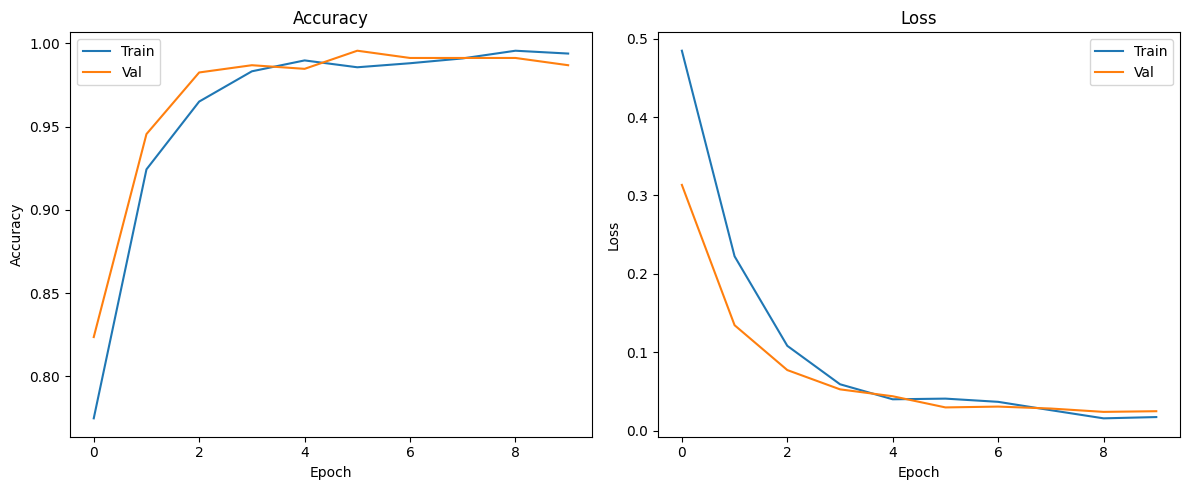

In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# 2. Clean text
def clean_text(text):
    text = re.sub(r'\S*@\S+', '', text)           # remove emails
    text = re.sub(r'http\S+|www.\S+', '', text)   # remove urls
    text = re.sub(r'[^a-zA-Z]', ' ', text)        # remove non-letters
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text

df['text'] = df['text'].apply(clean_text)

# 3. Tokenization and padding
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])

X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['spam'].values

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model with EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop]
)

# 7. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 8. Predict and show classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 9. Plot accuracy & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Save the model (optional)
# model.save("spam_detector_model.h5")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 128)            │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,379,273 (5.26 MB)

 Trainable params: 1,379,273 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 253ms/step - accuracy: 0.7529 - loss: 0.4442 - val_accuracy: 0.9412 - val_loss: 0.1595 - learning_rate: 0.0010
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 235ms/step - accuracy: 0.9703 - loss: 0.0715 - val_accuracy: 0.9869 - val_loss: 0.0806 - learning_rate: 0.0010
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 234ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9891 - val_loss: 0.0644 - learning_rate: 0.0010
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 228ms/step - accuracy: 0.9958 - loss: 0.0331 - val_accuracy: 0.9891 - val_loss: 0.0569 - learning_rate: 0.0010
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9978 - loss: 0.0116 - val_accuracy: 0.9913 - val_loss: 0.0580 - learning_rate: 0.0010
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9913 - val_loss: 0.0626 - learning_rate: 0.0010
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 1.0

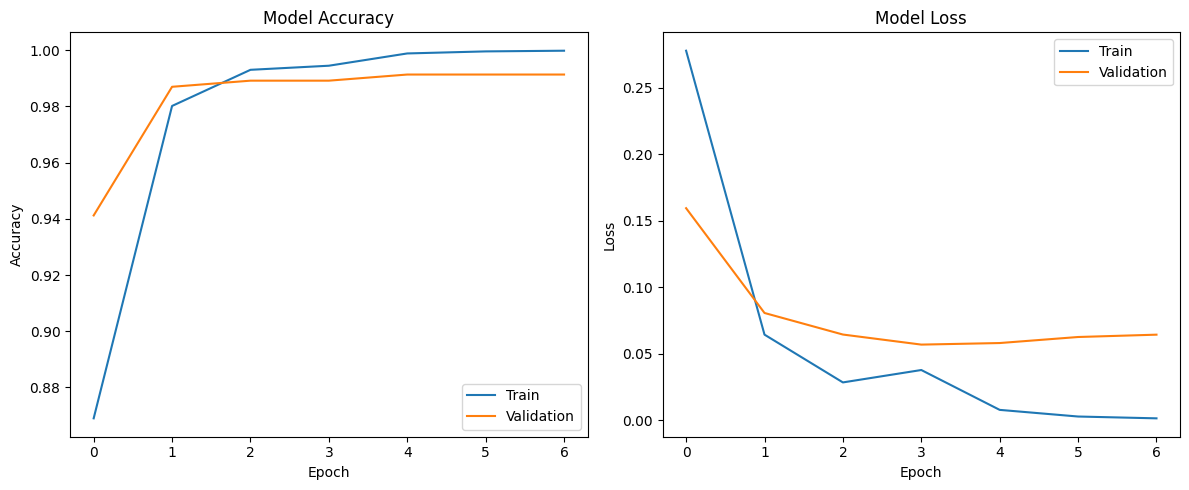

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import nltk

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')



# 🧹 Clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\S*@\S+', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words])

df['text'] = df['text'].astype(str).apply(clean_text)

# 🔠 Tokenize
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['spam'].values

# 🧪 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# 🌟 Custom Attention Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1), initializer='normal')
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1), initializer='zeros')
        super().build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        return K.sum(x * alpha, axis=1)

# 🏗️ Build the model
input_layer = Input(shape=(max_len,))
embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)
bilstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)
attention = Attention()(bilstm)
dropout = Dropout(0.5)(attention)
output = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)

# 🚆 Train
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# 📊 Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 🔍 Predict
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype("int32")

# 📋 Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 📈 Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.7946 - loss: 0.5503 - val_accuracy: 0.9586 - val_loss: 0.1243 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.9800 - loss: 0.0710 - val_accuracy: 0.9826 - val_loss: 0.0706 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.9883 - loss: 0.0390 - val_accuracy: 0.9869 - val_loss: 0.0419 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 164ms/step - accuracy: 0.9949 - loss: 0.0124 - val_accuracy: 0.9891 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.9891 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.9891 - val_loss: 0.0484 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - accuracy: 0.9978 - loss:

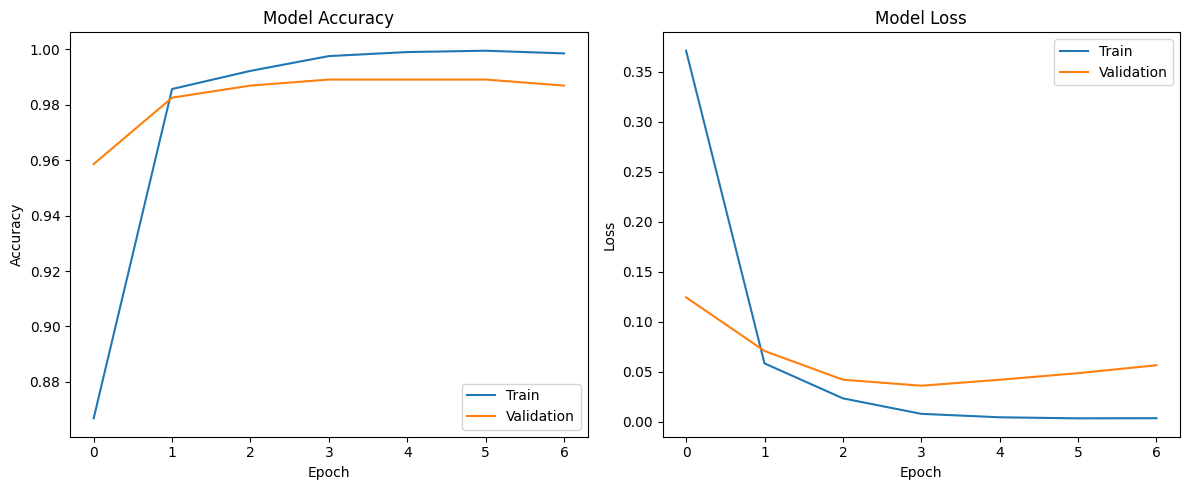

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')



# Clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\S*@\S+', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(clean_text)

# Tokenization and padding
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['spam'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# Predictions
probs = model.predict(X_test)
y_pred = (probs > 0.5).astype("int32")

# Classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Plot accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



🌀 Fold 1
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.6008 - loss: 0.5517 - val_accuracy: 0.9782 - val_loss: 0.0682 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 233ms/step - accuracy: 0.9865 - loss: 0.0547 - val_accuracy: 0.9956 - val_loss: 0.0226 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.9963 - loss: 0.0180 - val_accuracy: 0.9760 - val_loss: 0.0903 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.9975 - loss: 0.0140 - val_accuracy: 0.9978 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9956 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9978 - val_loss: 0.0198 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.9999 - loss:

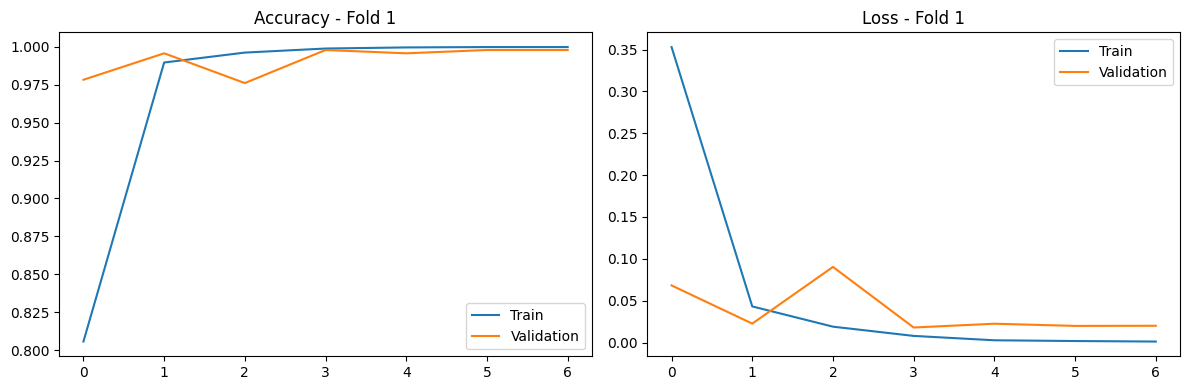


🌀 Fold 2
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 225ms/step - accuracy: 0.6252 - loss: 0.5659 - val_accuracy: 0.9847 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 218ms/step - accuracy: 0.9897 - loss: 0.0530 - val_accuracy: 0.9913 - val_loss: 0.0715 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.9811 - loss: 0.0715 - val_accuracy: 0.9891 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.9936 - loss: 0.0383 - val_accuracy: 0.9913 - val_loss: 0.0364 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - accuracy: 0.9977 - loss: 0.0146 - val_accuracy: 0.9913 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.9999 - loss: 0.0038 - val_accuracy: 0.9913 - val_loss: 0.0315 - learning_rate: 5.0000e-04
✅ Test Accuracy for Fold 2: 0.9825
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
  

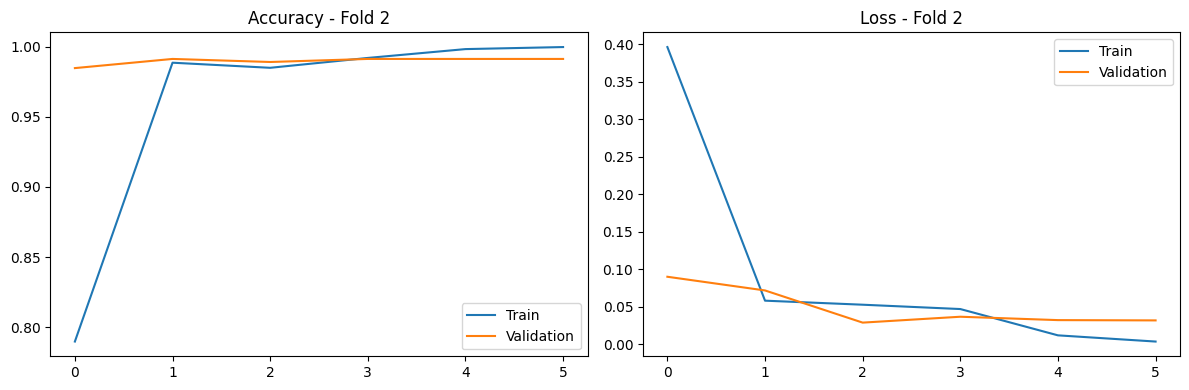


🌀 Fold 3
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.5950 - loss: 0.5299 - val_accuracy: 0.9935 - val_loss: 0.0377 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 222ms/step - accuracy: 0.9865 - loss: 0.0566 - val_accuracy: 0.9913 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 228ms/step - accuracy: 0.9976 - loss: 0.0132 - val_accuracy: 0.9826 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 222ms/step - accuracy: 0.9965 - loss: 0.0133 - val_accuracy: 0.9913 - val_loss: 0.0290 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 238ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9913 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 222ms/step - accuracy: 0.9998 - loss:

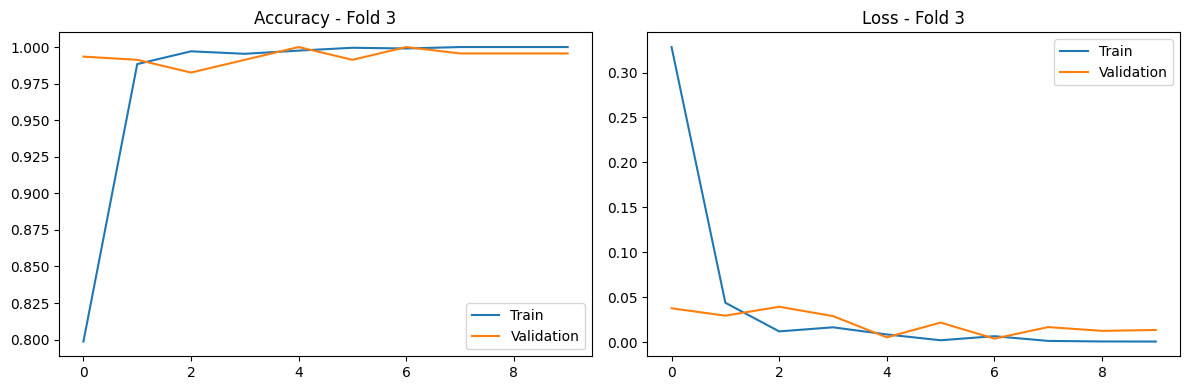


🌀 Fold 4
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 35s 241ms/step - accuracy: 0.5969 - loss: 0.5797 - val_accuracy: 0.9978 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 222ms/step - accuracy: 0.9841 - loss: 0.0734 - val_accuracy: 0.9782 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 226ms/step - accuracy: 0.9919 - loss: 0.0301 - val_accuracy: 0.9956 - val_loss: 0.0227 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9991 - loss: 0.0106 - val_accuracy: 0.9978 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 222ms/step - accuracy: 0.9997 - loss: 0.0042 - val_accuracy: 0.9978 - val_loss: 0.0132 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9891 - val_loss: 0.0354 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 28s 221ms/step - accuracy: 0.9995 - loss:

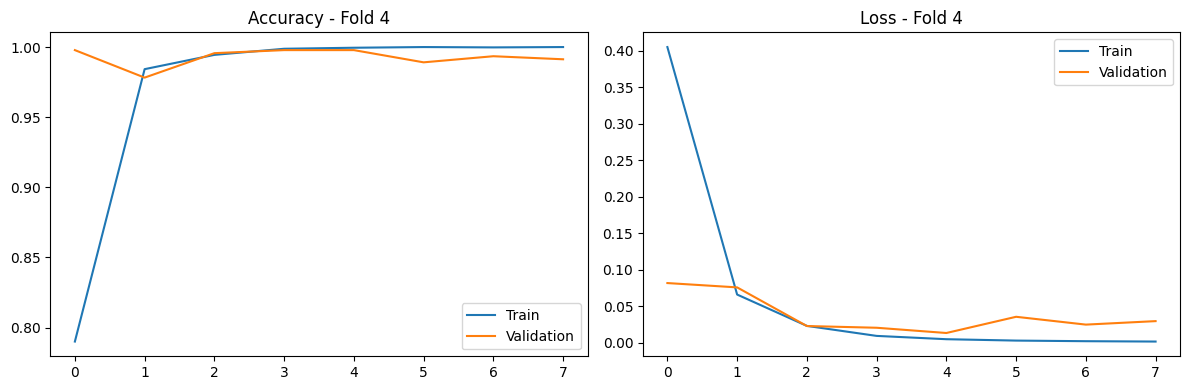


🌀 Fold 5
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.6039 - loss: 0.5385 - val_accuracy: 0.9760 - val_loss: 0.0904 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.9871 - loss: 0.0588 - val_accuracy: 0.9847 - val_loss: 0.0421 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9936 - loss: 0.0242 - val_accuracy: 0.9804 - val_loss: 0.0440 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9955 - loss: 0.0120 - val_accuracy: 0.9847 - val_loss: 0.0369 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.9973 - loss: 0.0071 - val_accuracy: 0.9891 - val_loss: 0.0300 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 222ms/step - accuracy: 0.9992 - loss: 0.0023 - val_accuracy: 0.9913 - val_loss: 0.0256 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.9990 - loss:

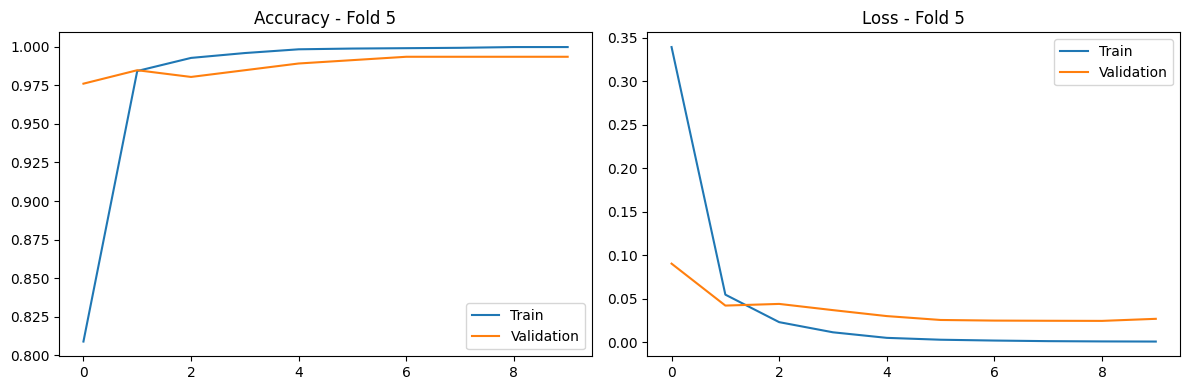

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# NLTK setup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = df[['text', 'spam']].dropna()

# Clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\S*@\S+', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words])

df['text'] = df['text'].apply(clean_text)

# Tokenize
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['spam'].values

# Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(X, y):
    print(f"\n🌀 Fold {fold}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Class weights
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))

    # Model
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)

    # Train
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop, lr_reduce],
        class_weight=class_weights,
        verbose=1
    )

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Test Accuracy for Fold {fold}: {acc:.4f}")

    # Predict & Report
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(classification_report(y_test, y_pred))

    # Plot (optional per fold)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Accuracy - Fold {fold}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Loss - Fold {fold}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    fold += 1


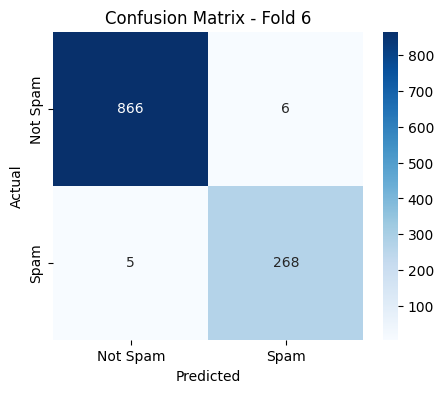

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title(f'Confusion Matrix - Fold {fold}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import nltk
import os
import pickle


# NLTK setup
nltk.download('stopwords')
nltk.download('wordnet')



df = df[['text', 'spam']].dropna()

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import nltk
import os
import pickle

# NLTK setup
nltk.download('stopwords')
nltk.download('wordnet')

# === Load and clean dataset ===
# Example: df = pd.read_csv('spam.csv')
df = df[['text', 'spam']].dropna()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\S*@\S+', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words])

df['text'] = df['text'].apply(clean_text)

# === Tokenization ===
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['spam'].values

# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# === Build model ===
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)

# === Train ===
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights,
    verbose=1
)

# === Evaluate ===
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")

# === Save model ===
os.makedirs('saved_models', exist_ok=True)
model_path = 'saved_models/spam_classifier.h5'
model.save(model_path)
print(f"💾 Saved model to {model_path}")

# === Predict & Report ===
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# === Plot ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === Load model and tokenizer later for inference ===

# Load tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load model
model = load_model('saved_models/spam_classifier.h5')
print("✅ Loaded model from saved_models/spam_classifier.h5")

# Example inference
sample_text = ["You have won $1000! Claim now."]
sample_text = [clean_text(t) for t in sample_text]
seq = tokenizer.texts_to_sequences(sample_text)
padded = pad_sequences(seq, maxlen=max_len)
prediction = model.predict(padded)
print(f"📨 Prediction: {prediction[0][0]:.4f} (1 = spam, 0 = not spam)")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


NameError: name 'df' is not defined